In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
#解决在使用PyTorch时出现的重复库加载冲突问题

In [2]:
#动手练习：创建图像自动分类器

In [2]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.utils.data as Data
from torchvision import datasets, models, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=transform) #已下载用download=False，否则为True
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=4)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.to(device)
criterion = nn.CrossEntropyLoss()#损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)#优化器

In [11]:
#训练模型
nums_epoch = 2
for epoch in range(nums_epoch):
    _loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _loss += loss.item()
        if i % 3000 == 2999:
            print('[%d, %5d] 损失: %.3f' %
                  (epoch + 1, i + 1, _loss / 3000))
            _loss = 0.0

print('训练结束')

[1,  3000] 损失: 2.112
[1,  6000] 损失: 1.711
[1,  9000] 损失: 1.560
[1, 12000] 损失: 1.499
[2,  3000] 损失: 1.420
[2,  6000] 损失: 1.380
[2,  9000] 损失: 1.328
[2, 12000] 损失: 1.297
训练结束


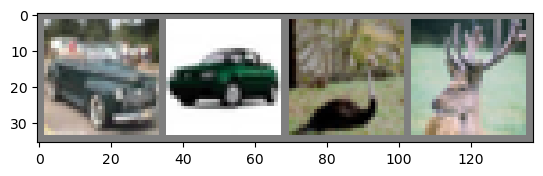

图像真实分类:    car   car  bird  deer


In [6]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()# # 将Tensor转为numpy数组
    plt.imshow(np.transpose(npimg, (1, 2, 0)))#转换维度
    plt.show()

dataiter = iter(testloader)## 创建测试数据迭代器
images, labels = dataiter.next()# 获取一个批次的数据
imshow(torchvision.utils.make_grid(images))#将多个图像拼接成一个网格
print('图像真实分类: ', ' '.join(['%5s' % classes[labels[j]] for j in range(4)]))

In [ ]:
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (labels == predicted).sum().item()
    
print('测试集准确率: %d %%' % (100 * correct / total))